In [1]:
import tensortools as tt
import numpy as np
import preprocessing as pp
import utilities as u
import scipy as sp

% matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

In [3]:
mouse = '4139219.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]

sess = df_mouse.iloc[10]


In [21]:
VRDat,C, S, A = pp.load_scan_sess(sess,fneu_coeff=0)
#C = sp.stats.zscore(C,axis=0)
cmax = np.mean(C,axis=0)
print(cmax.shape)
C= np.divide(C,np.dot(np.ones([C.shape[0],1]),cmax[np.newaxis,:]))
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds,bin_size=10)
C_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(C,VRDat.pos._values,tstart_inds,teleport_inds,bin_size=10)



C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(1795,)


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:256: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:257: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [22]:
import pickle
with open("G:\\My Drive\\2P_Data\\TwoTower\\4139219.2\\23_10_2018\\TwoTower_Timeout\\data.pkl",'wb') as f:
    pickle.dump({'C':C,'VRDat':VRDat,'C_trial_pos_N':C_trial_mat,'posbins':centers,'trial_info':trial_info},f)
    


In [23]:
print(C_trial_mat.shape)

(120, 45, 1795)


In [24]:
print(trial_info.keys())

dict_keys(['morphs', 'max_pos', 'rewards', 'zone0_licks', 'zone1_licks', 'zone0_speed', 'zone1_speed', 'pcnt', 'wallJitter', 'towerJitter', 'bckgndJitter', 'clickOn', 'pos_lick', 'omissions'])


In [25]:
mdl=tt.Ensemble(fit_method='ncp_hals',nonneg=True)

In [26]:
print(C_trial_mat.shape)

(120, 45, 1795)


In [27]:
mdl.fit(C_trial_mat[:,:20,:].T, ranks=range(1, 10), replicates=5)




Fitting rank-1 models:   0%|                                                                     | 0/5 [00:00<?, ?it/s]


Fitting rank-1 models:  20%|████████████▏                                                | 1/5 [00:00<00:02,  1.66it/s]


Fitting rank-1 models:  40%|████████████████████████▍                                    | 2/5 [00:01<00:01,  1.65it/s]


Fitting rank-1 models:  60%|████████████████████████████████████▌                        | 3/5 [00:01<00:01,  1.61it/s]


Fitting rank-1 models:  80%|████████████████████████████████████████████████▊            | 4/5 [00:02<00:00,  1.62it/s]


Fitting rank-1 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.65it/s]


                                                                                                                       

Rank-1 models:  min obj, 0.22;  max obj, 0.22;  time to fit, 2.8s





Fitting rank-2 models:   0%|                                                                     | 0/5 [00:00<?, ?it/s]


Fitting rank-2 models:  20%|████████████▏                                                | 1/5 [00:07<00:28,  7.07s/it]


Fitting rank-2 models:  40%|████████████████████████▍                                    | 2/5 [00:17<00:24,  8.04s/it]


Fitting rank-2 models:  60%|████████████████████████████████████▌                        | 3/5 [00:25<00:16,  8.20s/it]


Fitting rank-2 models:  80%|████████████████████████████████████████████████▊            | 4/5 [00:41<00:10, 10.44s/it]


Fitting rank-2 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:48<00:00,  9.52s/it]


                                                                                                                       

Rank-2 models:  min obj, 0.21;  max obj, 0.21;  time to fit, 48.7s





Fitting rank-3 models:   0%|                                                                     | 0/5 [00:00<?, ?it/s]


Fitting rank-3 models:  20%|████████████▏                                                | 1/5 [00:14<00:56, 14.05s/it]


Fitting rank-3 models:  40%|████████████████████████▍                                    | 2/5 [00:30<00:44, 14.74s/it]


Fitting rank-3 models:  60%|████████████████████████████████████▌                        | 3/5 [00:40<00:26, 13.43s/it]


Fitting rank-3 models:  80%|████████████████████████████████████████████████▊            | 4/5 [00:51<00:12, 12.77s/it]


Fitting rank-3 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [01:02<00:00, 12.23s/it]


                                                                                                                       

Rank-3 models:  min obj, 0.21;  max obj, 0.21;  time to fit, 62.7s





Fitting rank-4 models:   0%|                                                                     | 0/5 [00:00<?, ?it/s]


Fitting rank-4 models:  20%|████████████▏                                                | 1/5 [00:14<00:56, 14.16s/it]


Fitting rank-4 models:  40%|████████████████████████▍                                    | 2/5 [00:36<00:49, 16.53s/it]


Fitting rank-4 models:  60%|████████████████████████████████████▌                        | 3/5 [00:49<00:31, 15.55s/it]


Fitting rank-4 models:  80%|████████████████████████████████████████████████▊            | 4/5 [01:00<00:14, 14.31s/it]


Fitting rank-4 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [01:14<00:00, 14.12s/it]


                                                                                                                       

Rank-4 models:  min obj, 0.20;  max obj, 0.20;  time to fit, 74.3s





Fitting rank-5 models:   0%|                                                                     | 0/5 [00:00<?, ?it/s]


Fitting rank-5 models:  20%|████████████▏                                                | 1/5 [00:19<01:16, 19.06s/it]


Fitting rank-5 models:  40%|████████████████████████▍                                    | 2/5 [00:28<00:48, 16.30s/it]


Fitting rank-5 models:  60%|████████████████████████████████████▌                        | 3/5 [00:42<00:30, 15.42s/it]


Fitting rank-5 models:  80%|████████████████████████████████████████████████▊            | 4/5 [00:56<00:15, 15.06s/it]


Fitting rank-5 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [01:07<00:00, 13.98s/it]


                                                                                                                       

Rank-5 models:  min obj, 0.20;  max obj, 0.20;  time to fit, 67.7s





Fitting rank-6 models:   0%|                                                                     | 0/5 [00:00<?, ?it/s]


Fitting rank-6 models:  20%|████████████▏                                                | 1/5 [00:15<01:03, 15.84s/it]


Fitting rank-6 models:  40%|████████████████████████▍                                    | 2/5 [00:41<00:56, 18.91s/it]


Fitting rank-6 models:  60%|████████████████████████████████████▌                        | 3/5 [00:58<00:36, 18.22s/it]


Fitting rank-6 models:  80%|████████████████████████████████████████████████▊            | 4/5 [01:23<00:20, 20.11s/it]


Fitting rank-6 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [01:38<00:00, 18.61s/it]


                                                                                                                       

Rank-6 models:  min obj, 0.20;  max obj, 0.20;  time to fit, 97.9s





Fitting rank-7 models:   0%|                                                                     | 0/5 [00:00<?, ?it/s]


Fitting rank-7 models:  20%|████████████▏                                                | 1/5 [00:20<01:22, 20.66s/it]


Fitting rank-7 models:  40%|████████████████████████▍                                    | 2/5 [00:35<00:56, 18.94s/it]


Fitting rank-7 models:  60%|████████████████████████████████████▌                        | 3/5 [00:51<00:35, 17.96s/it]


Fitting rank-7 models:  80%|████████████████████████████████████████████████▊            | 4/5 [01:17<00:20, 20.45s/it]


Fitting rank-7 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [01:37<00:00, 20.42s/it]


                                                                                                                       

Rank-7 models:  min obj, 0.19;  max obj, 0.19;  time to fit, 97.6s





Fitting rank-8 models:   0%|                                                                     | 0/5 [00:00<?, ?it/s]


Fitting rank-8 models:  20%|████████████▏                                                | 1/5 [00:28<01:55, 28.96s/it]


Fitting rank-8 models:  40%|████████████████████████▍                                    | 2/5 [00:58<01:27, 29.19s/it]


Fitting rank-8 models:  60%|████████████████████████████████████▌                        | 3/5 [01:26<00:57, 28.72s/it]


Fitting rank-8 models:  80%|████████████████████████████████████████████████▊            | 4/5 [01:51<00:27, 27.55s/it]


Fitting rank-8 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [02:09<00:00, 24.93s/it]


                                                                                                                       

Rank-8 models:  min obj, 0.19;  max obj, 0.19;  time to fit, 129.7s





Fitting rank-9 models:   0%|                                                                     | 0/5 [00:00<?, ?it/s]


Fitting rank-9 models:  20%|████████████▏                                                | 1/5 [00:30<02:03, 30.85s/it]


Fitting rank-9 models:  40%|████████████████████████▍                                    | 2/5 [00:53<01:25, 28.45s/it]


Fitting rank-9 models:  60%|████████████████████████████████████▌                        | 3/5 [01:32<01:03, 31.63s/it]


Fitting rank-9 models:  80%|████████████████████████████████████████████████▊            | 4/5 [02:01<00:30, 30.72s/it]


Fitting rank-9 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [02:27<00:00, 29.32s/it]


                                                                                                                       

Rank-9 models:  min obj, 0.19;  max obj, 0.19;  time to fit, 147.1s


(0, 20)

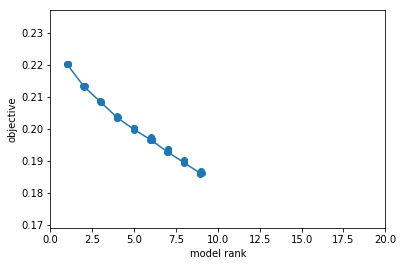

In [28]:
ax=tt.plot_objective(mdl)
ax.set_xlim([0,20])

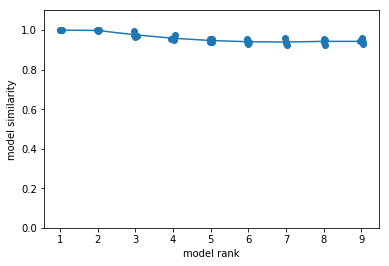

In [29]:
ax=tt.plot_similarity(mdl)
#ax.set_xlim([10,25])

In [30]:
best_mdl=9

In [31]:
# take rank 15 results, seems like parsimonious local minima
obj = mdl.objectives(best_mdl)
# get best model
mdl_hat = mdl.results[best_mdl][0]
# get factors from best model
U=mdl_hat.factors

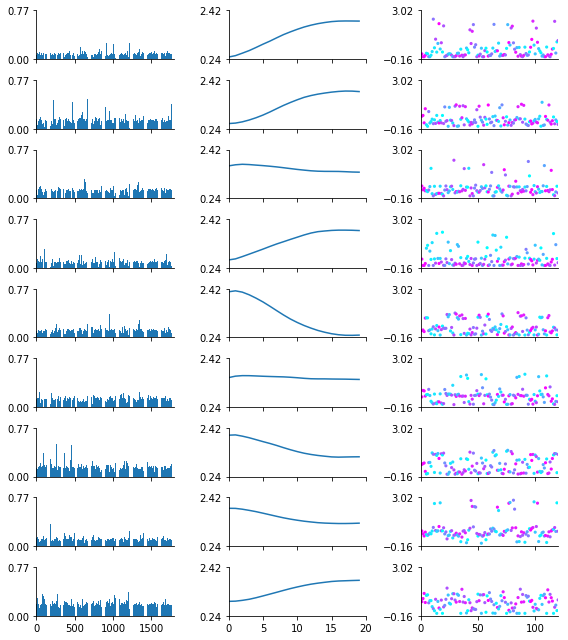

In [32]:
f,ax,plot_obj = tt.plot_factors(U,plots=['bar','line','scatter'],
                                scatter_kw={'c':trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter'],'cmap':'cool'})

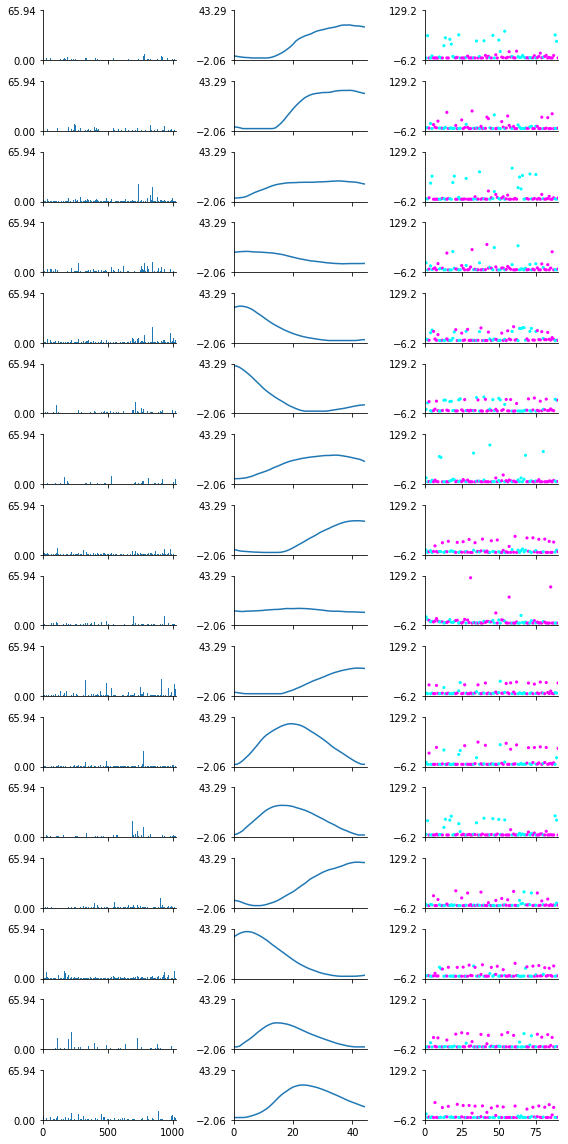

In [97]:
f,ax,plot_obj = tt.plot_factors(U,plots=['bar','line','scatter'],
                                scatter_kw={'c':trial_info['morphs']+trial_info['bckgndJitter']>.5,
                                            'cmap':'cool'}) #,
                                           #'s':-10*((trial_info['rewards']>0)-1)+3})

In [ ]:
print(trial_info.keys())